# Topic modeling analysis 

In [10]:
import re
import string
import numpy as np
from math import pi
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from flexibility import *

In [3]:
# Humans
humans = pd.read_csv('./data_processed/humans_data_processed.csv')
print('Humans:', len(humans))
objects = list(humans['prompt'].value_counts().head(4).index)
humans.head()

Humans: 10985


,prompt,response,originality,elaboration,dissimilarity,elaboration_SW,flexibility
0,brick,strength tester (punching),2.7,5,0.294817,5,0.00000
1,brick,art,2.1,1,0.330149,1,0.00000
2,brick,pencil holder,2.1,2,0.246490,2,1.50901
3,brick,writing utensil,2.1,2,0.232353,2,0.00000
4,brick,earrings,2.2,1,0.275411,1,0.00000


In [ ]:
num_topics = 6
num_words = 10

dict_kw_coeff = run_LDA_on_humans_data(humans, num_topics, num_words, print_keywords = False, objects = objects)
pprint(dict_kw_coeff[:num_topics]) # print coeff for the first object

### Choose the best number of topics

**Plot** coherence with respect to the number of topics

In [ ]:
# takes 9-10 min to run
cm_topic = pd.DataFrame(columns = ['object', 'num_topic', 'coherence_score'])
num_topics = 16
num_words = 5

for N in range(2, num_topics):
    lda_model_brick = create_lda_model(humans, 'brick', num_topics=N)
    lda_model_box = create_lda_model(humans, 'box', num_topics=N)
    lda_model_knife = create_lda_model(humans, 'knife', num_topics=N)
    lda_model_rope = create_lda_model(humans, 'rope', num_topics=N)

    lda_model_list = [lda_model_brick, lda_model_box, lda_model_knife, lda_model_rope]

    humans_topic,  df_kw_per_topic, perplexity, coherence_score, coherence_score_per_topic = assign_topic_all(humans, lda_model_list, print_keywords = False, num_topics = N, num_words = num_words)
    for j, object in enumerate(objects):
        cm_topic.loc[len(cm_topic)] = [object, N, coherence_score[j]]
cm_topic.head()

Number of documents in corpus for object "brick": 4056


Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048
Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048
Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048
Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048
Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in c

,object,num_topic,coherence_score
0,brick,2,0.408381
1,box,2,0.500564
2,knife,2,0.623351
3,rope,2,0.550544
4,brick,3,0.520319


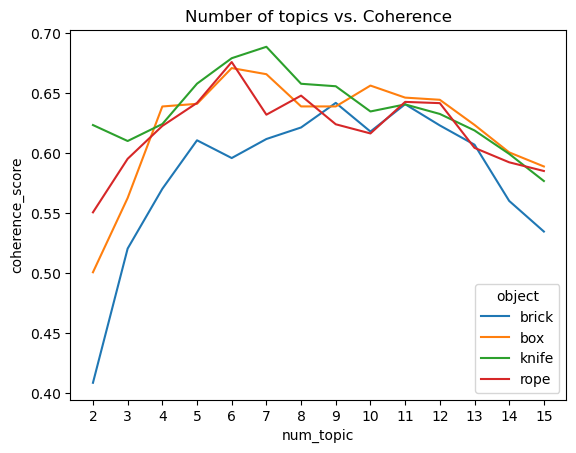

In [ ]:
# plot
sns.lineplot(data = cm_topic, x = 'num_topic', y = 'coherence_score', hue = 'object')
# only integers on x axis 
plt.xticks(np.arange(2, num_topics, 1))
plt.title("Number of topics vs. Coherence")
plt.show()

### We choose 6 topics for each object!

## Topics overlap in dataset

In [7]:
# Function to calculate Jaccard similarity between two lists
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048


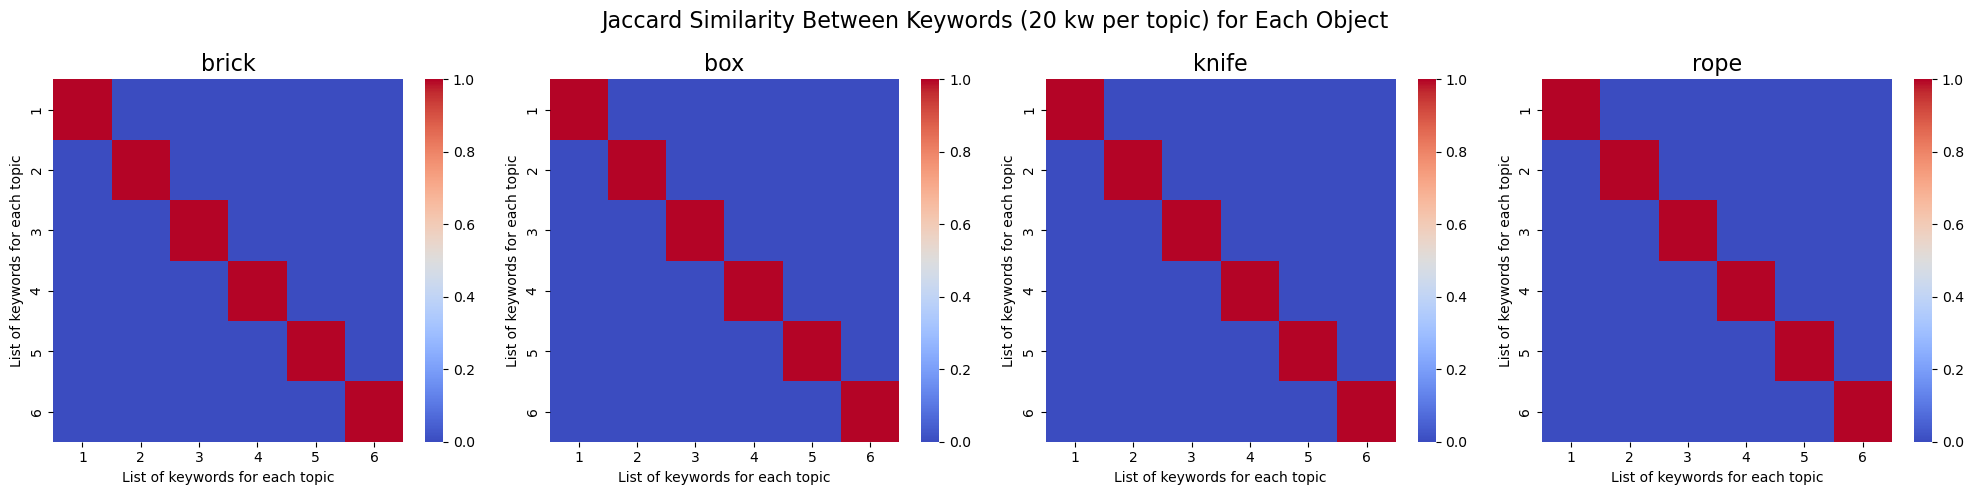

In [14]:
N = 6
num_words = 20

lda_model_brick = create_lda_model(humans, 'brick', num_topics=N)
lda_model_box = create_lda_model(humans, 'box', num_topics=N)
lda_model_knife = create_lda_model(humans, 'knife', num_topics=N)
lda_model_rope = create_lda_model(humans, 'rope', num_topics=N)
lda_model_list = [lda_model_brick, lda_model_box, lda_model_knife, lda_model_rope]
humans_topic,  df_kw_per_topic, perplexity, coherence_score, coherence_score_per_topic = assign_topic_all(humans, lda_model_list, print_keywords = False, num_topics = N, num_words = num_words)

fig, axs = plt.subplots(1, 4, figsize = (20,5))
for idx, object in enumerate(objects):
    
    keyword_lists = df_kw_per_topic[df_kw_per_topic['object'] == object]['keywords'].tolist()
    
    # Calculate Jaccard similarity matrix
    num_lists = len(keyword_lists)
    similarity_matrix = np.zeros((num_lists, num_lists))
    for i in range(num_lists):
        for j in range(i, num_lists):
            similarity_matrix[i, j] = jaccard_similarity(keyword_lists[i], keyword_lists[j])
            similarity_matrix[j, i] = similarity_matrix[i, j]  # Symmetric matrix
    # Plot heatmap
    sns.heatmap(similarity_matrix, annot=False, cmap='coolwarm', fmt='.2f', xticklabels=range(1, num_lists + 1), yticklabels=range(1, num_lists + 1), ax = axs[idx])
    axs[idx].set_xlabel('List of keywords for each topic')
    axs[idx].set_ylabel('List of keywords for each topic')
    axs[idx].set_title(object, fontsize = 16)
plt.suptitle(f"Jaccard Similarity Between Keywords ({num_words} kw per topic) for Each Object", fontsize = 16)
plt.tight_layout()
plt.show()

In [16]:
df_kw_per_topic.head(10)

,object,topic,keywords
0,brick,0,"[use, make, brick, used, paint, could, art, li..."
1,brick,1,"[door, keep, holder, prop, tool, rolling, open..."
2,brick,2,"[build, someone, wall, garden, flower, weapon,..."
3,brick,3,"[hold, put, hole, thing, break, building, tabl..."
4,brick,4,"[something, weight, car, throw, paper, lift, p..."
5,brick,5,"[house, window, one, tire, chair, bug, bed, si..."
6,box,0,"[hide, child, room, inside, mat, apart, person..."
7,box,1,"[make, use, design, sled, costume, could, card..."
8,box,2,"[wall, pencil, play, table, used, kid, like, t..."
9,box,3,"[put, holder, box, house, car, pet, space, sto..."


### Evaluate topic modeling

KeyError: 'coherence_score'

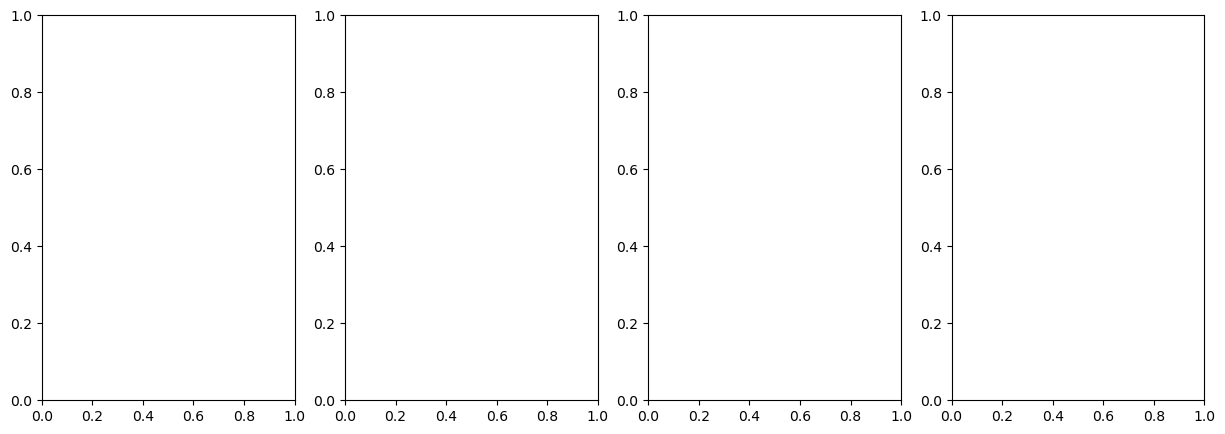

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for idx, object in enumerate(objects):
    topics = df_kw_per_topic[df_kw_per_topic['object'] == object]['keywords'].tolist()
    coherence_per_topic = df_kw_per_topic[df_kw_per_topic['object'] == object]['coherence_score'].tolist()

    topics_str = [ '\n '.join(t) for t in topics ]
    data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
    data_topic_score = data_topic_score.set_index('Topic')

    sns.heatmap(data=data_topic_score, annot=True, square=True,
                cmap='Reds', fmt='.2f',
                linecolor='black', ax=axs[idx], vmin=0.5, vmax=1)
    axs[idx].tick_params(axis = 'y', rotation = 0)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    axs[idx].set_title(object)
plt.suptitle("Topics coherence $C_v$")
plt.tight_layout()
plt.show()

### Visualize topic modeling with pyLDAvis

In [ ]:
#visu_with_pyldavis(lda_model_brick, humans, object = 'brick')

# Comparison 

- Humans annotation vs. OCSAI vs. OCSTB for Humans
- OCSAI vs. OCSTB for LLMs

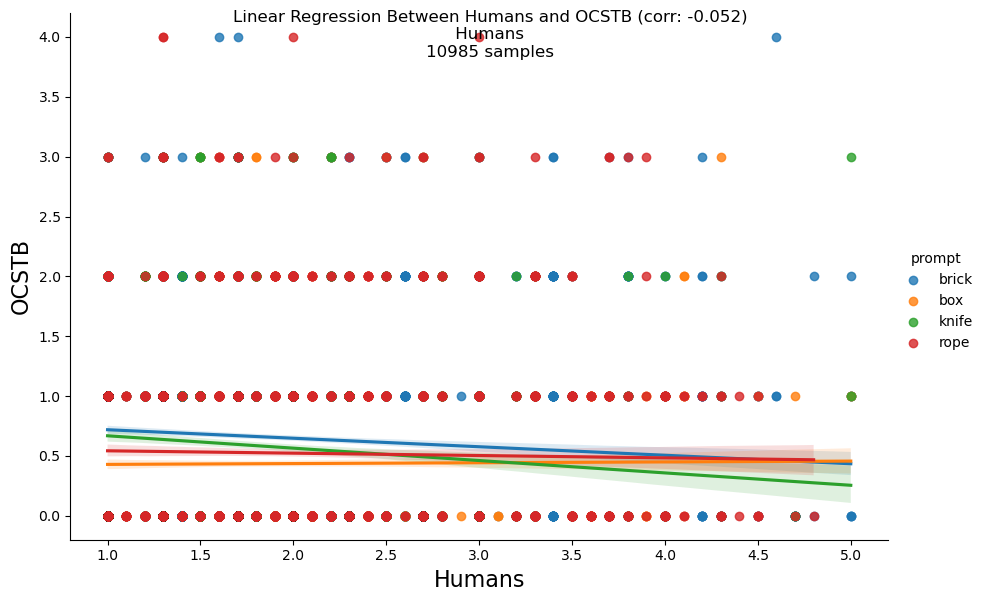

In [ ]:
# Compute correlation
correlation = df_topic_score['originality'].corr(df_topic_score['flexibility'])

# Plot linear regression line
#fig, axs = plt.subplots(1, 2, figsize = (15,6))
#sns.lmplot(data=df_topic_score, x='originality', y='originality_topic', col = 'prompt', height=6, aspect=1.5)
sns.lmplot(x='originality', y='flexibility', data=df_topic_score, hue = 'prompt', height=6, aspect=1.5)
#sns.lmplot(x='originality', y='originality_topic', data=df_topic_score, height=6, aspect=1.5)
plt.suptitle(f'Linear Regression Between Humans and OCSTB (corr: {correlation.round(3)})\n Humans \n{len(df_topic_score)} samples')
plt.xlabel('Humans', fontsize = 16)
plt.ylabel('OCSTB', fontsize = 16)
plt.show()

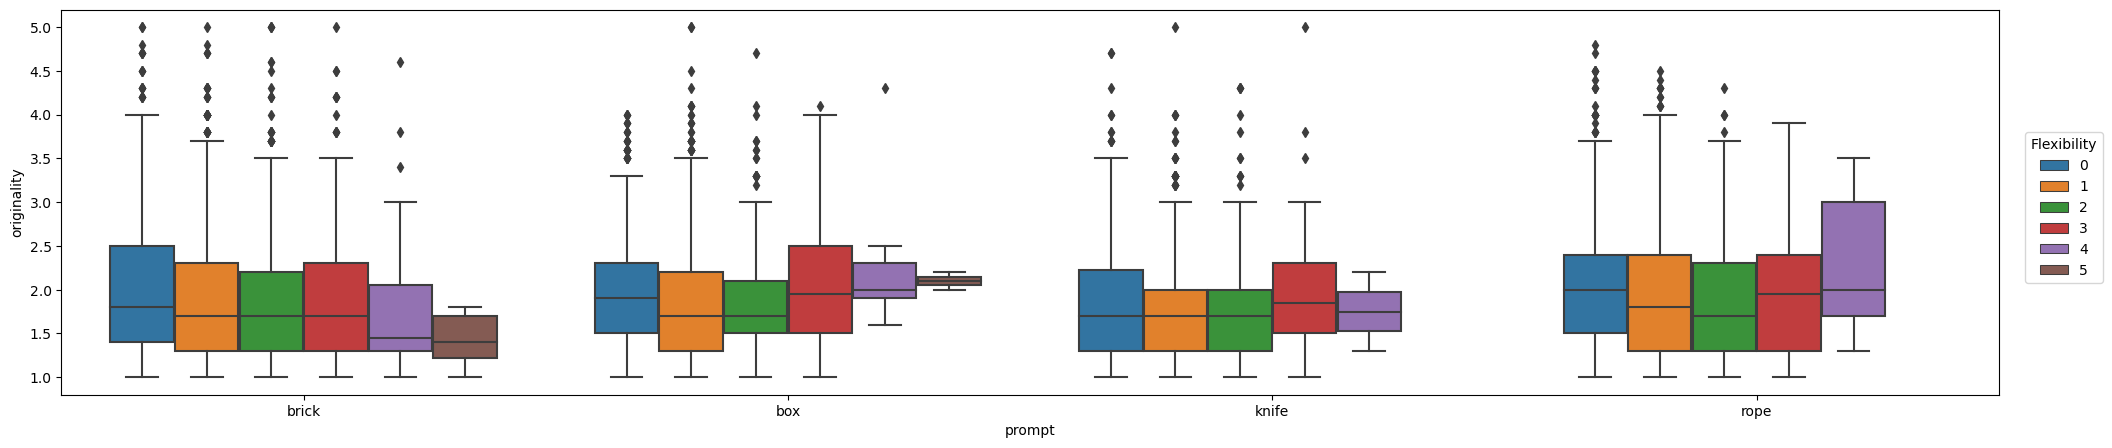

In [ ]:
# boxplots
plt.figure(figsize=(25, 5))
sns.boxplot(data=humans, x='prompt', y='originality', hue = 'flexibility', hue_order = np.arange(num_topics).tolist())
#plt.title("Originality per topic")
#plt.title(f"Originality per topic for Humans for {num_topics} topics, Perplexity: {np.array(perplexity).mean().round(3)}, Coherence score: {np.array(coherence_score).mean().round(3)}", fontsize = 16)

plt.legend(title = 'Flexibility', bbox_to_anchor=(1.01, 0.7), loc='upper left')
plt.show()

<Axes: xlabel='flexibility', ylabel='originality'>

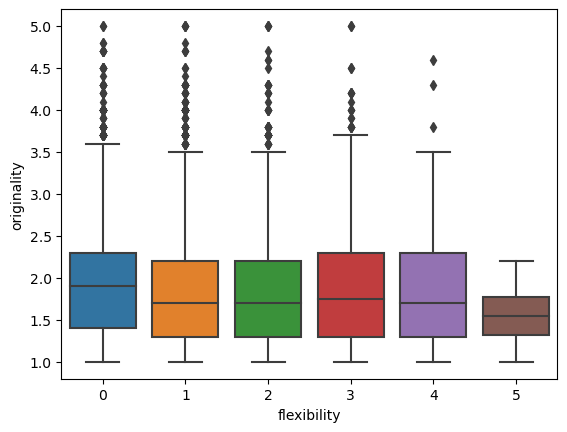

In [ ]:
sns.boxplot(data = humans, x = 'flexibility', y = 'originality')

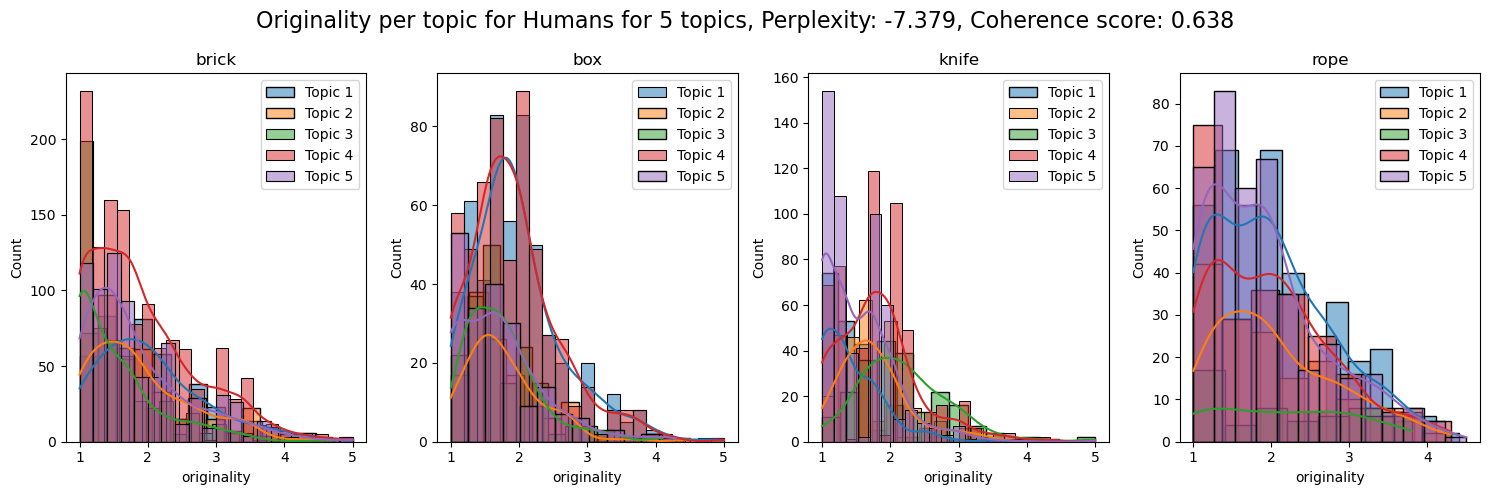

In [ ]:
#plot_originality_per_topic(humans, lda_model_list, 'Humans', False, num_topics)